In [1]:
!pip install pandas numpy matplotlib seaborn scipy

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\Asus\Desktop\retail_sales_dataset.csv")
print(data.head())
print(data.info())
print(data.isnull().sum())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [11]:
data = data.dropna(thresh=len(data)*0.5,axis=1)
data['Quantity']=data['Quantity'].fillna(data['Quantity'].mean())
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop_duplicates()
print(data.isnull().sum())
print(data.dtypes)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [15]:
print(data.describe())
mean_sales = data['Quantity'].mean()
median_sales = data['Quantity'].median()
std_sales = data['Quantity'].std()
print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Standard Deviation of Sales: {std_sales}")
unique_customers = data['Customer ID'].nunique()
print(f"Unique Customers: {unique_customers}")


       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

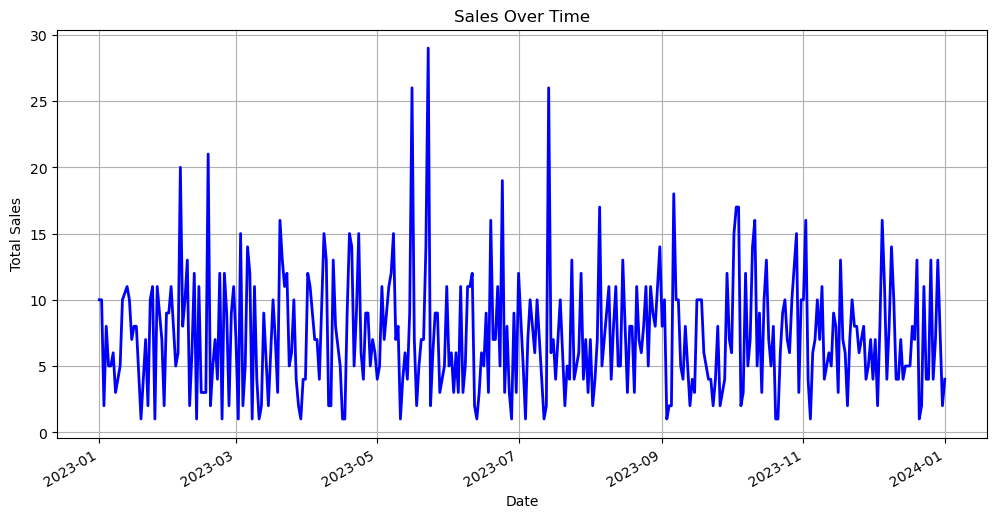

In [17]:
sales_by_date = data.groupby('Date')['Quantity'].sum()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sales_by_date.plot(title='Sales Over Time',color='blue',linewidth=2)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Customer ID
CUST500    4
CUST628    4
CUST259    4
CUST615    4
CUST257    4
CUST619    4
CUST253    4
CUST251    4
CUST626    4
CUST632    4
Name: Quantity, dtype: int64
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


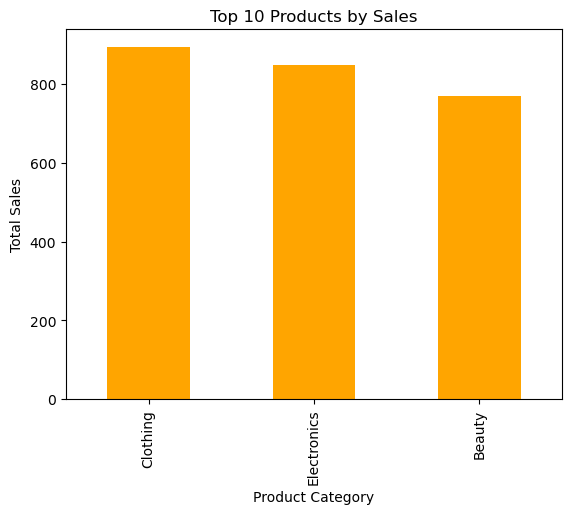

In [19]:
top_customers = data.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Step 7.2: Top 10 Products by Total Sales
top_products = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Step 7.3: Visualize Top Products
top_products.plot(kind='bar', title='Top 10 Products by Sales', color='orange')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

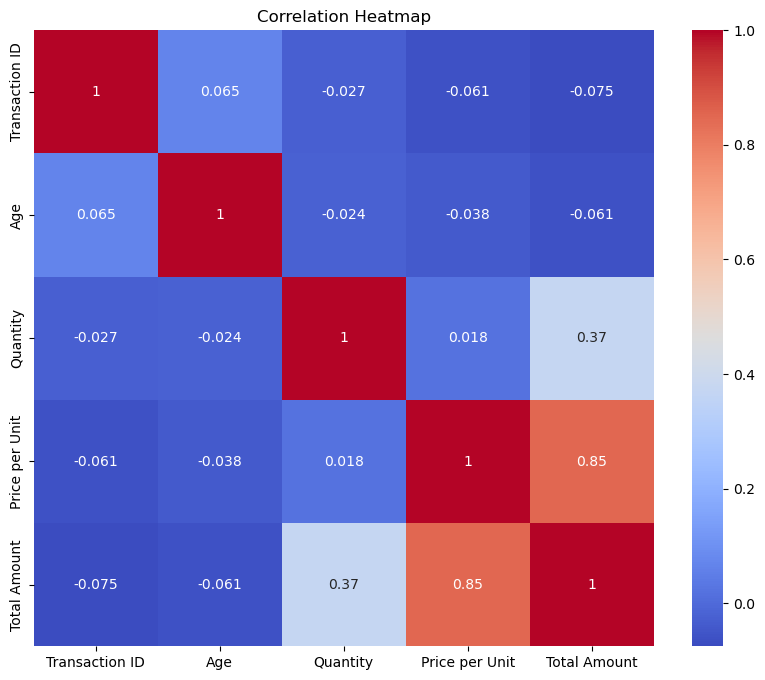

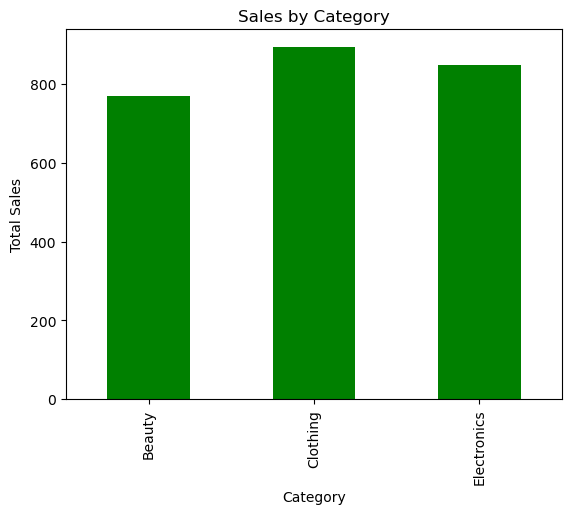

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt  # Make sure to import matplotlib for plotting

# Step 8.1: Correlation Heatmap
correlation_matrix = data.select_dtypes(include='number').corr()  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 8.2: Sales by Category (Example)
sales_by_category = data.groupby('Product Category')['Quantity'].sum()
sales_by_category.plot(kind='bar', title='Sales by Category', color='green')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()